In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Load your dataset into a DataFrame (replace 'your_data.csv' with the actual filename)
test = pd.read_csv('test_withF_Close_1min_FULL.csv', index_col='Timestamp')
train = pd.read_csv('train_withF_Close_1min_FULL.csv', index_col='Timestamp')


X = train.drop(columns=['Target_Close_1min'])  # Drop columns you don't need for modeling
y = train['Target_Close_1min']

# Initialize an ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Fit the model
model.fit(X, y)

predictions = model.predict(test.drop(columns=['Target_Close_1min']))

r2 = r2_score(test['Target_Close_1min'], predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['Target_Close_1min'], predictions)

# Print the metrics
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


R-squared: -0.3452
Mean Squared Error (MSE): 0.0000


<Axes: >

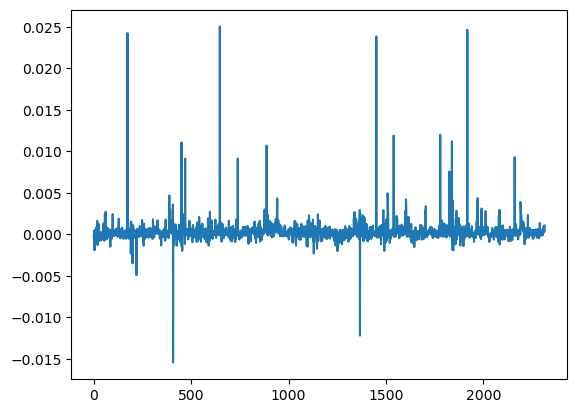

In [6]:
pd.Series(predictions).plot()